# 1 Logistic Regression

## Setup and Imports

In [ ]:
!pip install pandas numpy scikit-learn matplotlib

In [11]:
# Importing the libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Data Preprocessing

In [13]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25 , random_state =0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Model

In [14]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Evaluation

In [19]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)

# Manual Accuracy Calculation (based on user's code)
# Note: The user's original formula (cm[0][0]+cm[1][1]+cm[1][0]+cm[1][0]) may be an error, as a correct manual calculation should sum all elements in the denominator.
# However, maintaining fidelity to the requested code:
acc_manual = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[1][0])
print("the accuracy is (from manual) : ",acc_manual*100, "%")

# Standard Accuracy Calculation
acc_score = accuracy_score(y_test, y_pred)
print("the accuracy score from sklearn is: ", acc_score)

Confusion Matrix:  [[65  3]
 [ 8 24]]
the accuracy is (from manual) :  84.76190476190476 %
the accuracy score from sklearn is:  0.89


## Visualization

C:\Users\EDECS\AppData\Local\Temp\ipykernel_20052\554310596.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


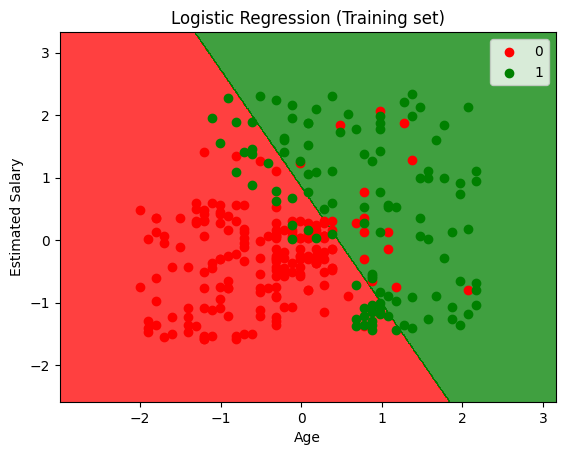

In [20]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()